## Passo a passo
1. Criar um wrapper para cada site
  - Criação do conjunto rotulado
2. Implementar uma solução para todos os sites
  - Extra: implementar mais uma solução e fazer análise de erros
3. Comparar estratégias (Accuracy, precision, recall...)

## Dependências

In [ ]:
import re
from urllib.request import urlopen, build_opener
from bs4 import BeautifulSoup

## Extratores

### Amazon

In [ ]:
url = 'https://www.amazon.com.br/1984-George-Orwell/dp/6589678006/ref=pd_sbs_sccl_2_2/138-0676212-7582358?pd_rd_w=6EihY&content-id=amzn1.sym.4e54af11-91e7-41b0-af49-07bca5d2336e&pf_rd_p=4e54af11-91e7-41b0-af49-07bca5d2336e&pf_rd_r=7R3KTYFYJA2Y86HBFX8X&pd_rd_wg=AzznA&pd_rd_r=453769c7-9fc0-45ef-8e07-faa7367b2c58&pd_rd_i=6589678006&psc=1#detailBullets_feature_div'
soup = BeautifulSoup(get(url).text, 'html.parser')

In [ ]:
get(url).text

In [ ]:
soup

In [ ]:
title = soup.find(id='productTitle')

In [ ]:
title

TypeError: ignored

### Cultura

#### Testes

In [ ]:
url = 'https://www3.livrariacultura.com.br/corpo-fala-61038/p'
opener = build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
soup = BeautifulSoup(opener.open(url), 'html.parser')

In [ ]:
title = soup.find("h1", {"class": "title_product"}).div.string

In [ ]:
title

'CORPO FALA'

In [ ]:
author_div = soup.find(class_='meta authors')
author = author_div.h2.a.string if author_div.h2.a else ''

In [ ]:
author

''

In [ ]:
publisher_div = soup.find('div', class_='publisher')
publisher = publisher_div.h2.div.a.string if publisher_div.h2.div else ''

In [ ]:
publisher

'VOZES'

In [ ]:
info_div = soup.find('div', id='info-product')
book_info = info_div.string if info_div else ''

In [ ]:
book_info

''

In [ ]:
prod_spec = soup.find(class_='section-produto-especificacoes')

In [ ]:
prod_spec

<section class="section-produto-especificacoes"><div class="container"><div class="info" id="produto-especificacoes"><div class="vtex-productSpecification" style="display: none;"><div id="caracteristicas"><h4 class="group Especificacoes">Especificações</h4><table cellspacing="0" class="group Especificacoes"><tr class="even"><th class="name-field Ano-de-Edicao">Ano de Edição</th><td class="value-field Ano-de-Edicao">2015</td></tr><tr><th class="name-field Colaborador">Colaborador</th><td class="value-field Colaborador">Autor:WEIL, PIERRE|Autor:TOMPAKOW, ROLAND</td></tr><tr class="even"><th class="name-field Editora">Editora</th><td class="value-field Editora">VOZES</td></tr><tr><th class="name-field ISBN">ISBN</th><td class="value-field ISBN">8532602088</td></tr><tr class="even"><th class="name-field Ano">Ano</th><td class="value-field Ano">2015</td></tr><tr><th class="name-field Edicao">Edição</th><td class="value-field Edicao">1</td></tr><tr class="even"><th class="name-field Origem">

In [ ]:
def treat_author(author_string: str):
  authors = author_string.split('|')
  result = []
  for a in authors:
    if not 'Autor' in a:
      continue
    name = a.replace('Autor:', '')
    name = name.split(', ')
    name.reverse()
    result.append(' '.join(name))
  return result

author_data = prod_spec.find('td', class_='value-field Colaborador')
authors = treat_author(author_data.string) if author_data else ''

In [ ]:
author_data

<td class="value-field Colaborador">Autor:WEIL, PIERRE|Autor:TOMPAKOW, ROLAND</td>

In [ ]:
authors

['PIERRE WEIL', 'ROLAND TOMPAKOW']

In [ ]:
isbn_data = prod_spec.find('td', class_='value-field ISBN')
isbn = isbn_data.string if isbn_data else ''

In [ ]:
isbn

'8532602088'

In [ ]:
year_data = prod_spec.find('td', class_='value-field Ano')
year = year_data.string if year_data else ''

In [ ]:
year

'2015'

In [ ]:
edition_data = prod_spec.find('td', class_='value-field Edicao')
edition = edition_data.string if edition_data else ''

In [ ]:
edition

'1'

In [ ]:
pages_data = prod_spec.find('td', class_='value-field Paginas')
pages = pages_data.string if pages_data else ''

In [ ]:
pages

'288'

In [ ]:
price_data = soup.find('em', class_='valor-por')
price_data

<em class="valor-por" productindex="0">Por: <strong class="skuBestPrice" productindex="0">R$ 45,50</strong></em>

In [ ]:
price = price_data.strong.string
price

'R$ 45,50'

#### Resultados
Juntando todas as informações numa função

In [ ]:
def extract_cultura_info(soup):
  def treat_author(author_string: str):
    authors = author_string.split('|')
    result = []
    for a in authors:
      if not 'Autor' in a:
        continue
      name = a.replace('Autor:', '')
      name = name.split(', ')
      name.reverse()
      result.append(' '.join(name))
    return result
  
  title = soup.find("h1", {"class": "title_product"}).div.string
  publisher_div = soup.find('div', class_='publisher')
  publisher = publisher_div.h2.div.a.string if publisher_div.h2.div else None
  info_div = soup.find('div', id='info-product')
  book_info = info_div.string if info_div else ''
  price_data = soup.find('em', class_='valor-por')
  price = price_data.strong.string if price_data else ''
  prod_spec = soup.find(class_='section-produto-especificacoes')
  if not publisher:
    publisher_data = prod_spec.find('td', class_='value-field Editora')
    publisher = publisher_data.string if publisher_data else ''
  author_data = prod_spec.find('td', class_='value-field Colaborador')
  authors = treat_author(author_data.string) if author_data else []
  isbn_data = prod_spec.find('td', class_='value-field ISBN')
  isbn = isbn_data.string if isbn_data else ''  
  language_data = prod_spec.find('td', class_='value-field Idioma')
  language = language_data.string if isbn_data else ''
  year_data = prod_spec.find('td', class_='value-field Ano')
  year = year_data.string if year_data else ''
  edition_data = prod_spec.find('td', class_='value-field Edicao')
  edition = edition_data.string if edition_data else ''
  pages_data = prod_spec.find('td', class_='value-field Paginas')
  pages = pages_data.string if pages_data else ''
  return {
      "title": title,
      "publisher": publisher,
      "price": price,
      "info": book_info,
      "authors": authors,
      "year": year,
      "isbn": isbn,
      "edition": edition,
      "pages": pages,
      "language": language
  }

In [ ]:
books = ['https://www3.livrariacultura.com.br/corpo-fala-61038/p',
  'https://www3.livrariacultura.com.br/naruto-gold-vol-1-2111902326/p',
  'https://www3.livrariacultura.com.br/o-ladrao-de-raios-capa-nova-42275209/p',
  'https://www3.livrariacultura.com.br/menos-que-um-2112320138/p',
  'https://www3.livrariacultura.com.br/thomas-sowell-a-biografia-2112320635/p',
  'https://www3.livrariacultura.com.br/gestao-com-gentileza-2112319991/p',
  'https://www3.livrariacultura.com.br/peaky-blinders-2112320052/p',
  'https://www3.livrariacultura.com.br/cacadas-de-pedrinho-2111919285/p',
  'https://www3.livrariacultura.com.br/dedoches-animais-2112297541/p?lista=1725',
  'https://www3.livrariacultura.com.br/stranger-things-cidade-nas-trevas-2112247884/p?lista=2099',
  'https://www3.livrariacultura.com.br/o-cavaleiro-preso-na-armadura-2112273695/p',
  'https://www3.livrariacultura.com.br/o-filho-do-terrorista-46016865/p',
  'https://www3.livrariacultura.com.br/a-verdade-e-outras-mentiras-46335302/p']

In [ ]:
len(books)

13

In [ ]:
for book in books:
  opener = build_opener()
  opener.addheaders = [('User-agent', 'Mozilla/5.0')]
  print(extract_cultura_info(BeautifulSoup(opener.open(book), 'html.parser')))

{'title': 'CORPO FALA', 'publisher': 'VOZES', 'price': 'R$ 45,50', 'info': '', 'authors': ['PIERRE WEIL', 'ROLAND TOMPAKOW'], 'year': '2015', 'isbn': '8532602088', 'edition': '1', 'pages': '288', 'language': 'PORTUGUÊS'}
{'title': 'NARUTO GOLD VOL. 1', 'publisher': 'PANINI LIVROS', 'price': 'R$ 23,73', 'info': '', 'authors': ['MASASHI KISHIMOTO'], 'year': '2022', 'isbn': '8542602412', 'edition': '1', 'pages': '192', 'language': 'PORTUGUÊS'}
{'title': 'O LADRÃO DE RAIOS - CAPA NOVA', 'publisher': 'INTRINSECA', 'price': 'R$ 38,43', 'info': '', 'authors': ['RICK RIORDAN'], 'year': '2014', 'isbn': '8580575397', 'edition': '1', 'pages': '400', 'language': 'PORTUGUÊS'}
{'title': 'MENOS QUE UM', 'publisher': 'LEYA.', 'price': 'R$ 44,98', 'info': '', 'authors': [], 'year': '', 'isbn': '', 'edition': '', 'pages': '', 'language': ''}
{'title': 'THOMAS SOWELL – A BIOGRAFIA', 'publisher': 'AVIS RARA', 'price': 'R$ 54,90', 'info': '', 'authors': [], 'year': '', 'isbn': '', 'edition': '', 'pages': '

### Companhia das letras

#### Testes

In [ ]:
url = 'https://www.companhiadasletras.com.br/livro/9788535923438/eu-sou-malala'
opener = build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
soup = BeautifulSoup(opener.open(url), 'html.parser')

In [ ]:
title = soup.find('div', class_='detalhe_livro_titulo').string
title

'EU SOU MALALA'

In [ ]:
authors_div = soup.find('div', class_='detalhe_livro_autor')
authors=[]
for a in authors_div.find_all('a'):
  authors.append(a.string)
authors

['Malala Yousafzai', 'Christina Lamb']

In [ ]:
price = soup.find('div', class_='preco').string
price

'R$ 52,90'

In [ ]:
details = soup.find_all('div', class_='bloco_txt_detalhe')
info = details[0].get_text()

In [ ]:
info

'\n          Quando o Talibã tomou controle do vale do Swat, uma menina levantou a voz. Malala Yousafzai recusou-se a permanecer em silêncio e lutou pelo seu direito à educação. Mas em 9 de outubro de 2012, uma terça-feira, ela quase pagou o preço com a vida. \nMalala foi atingida na cabeça por um tiro à queima-roupa dentro do ônibus no qual voltava da escola. Poucos acreditaram que ela sobreviveria.\nMas a recuperação milagrosa de Malala a levou em uma viagem extraordinária de um vale remoto no norte do Paquistão para as salas das Nações Unidas em Nova York. Aos dezesseis anos, ela se tornou um símbolo global de protesto pacífico e a candidata mais jovem da história a receber o Prêmio Nobel da Paz.\nEu sou Malala é a história de uma família exilada pelo terrorismo global, da luta pelo direito à educação feminina e dos obstáculos à valorização da mulher em uma sociedade que valoriza filhos homens. \nO livro acompanha a infância da garota no Paquistão, os primeiros anos de vida escolar,

In [ ]:
len(details)

4

In [ ]:
pages, year, isbn, publisher = '', '', '', ''
for span in details[1].find_all('span'):
  if span.string == 'Páginas:':
    pages = str(span.next_sibling).strip()
  if span.string == 'Lançamento:':
    year = str(span.next_sibling).split('/')[-1]
  if span.string == 'ISBN:':
    isbn = str(span.next_sibling).strip()
  if span.string == 'Selo:':
    publisher = str(span.next_sibling).strip()
pages, year, isbn, publisher

('360', '2013', '9788535923438', 'Companhia das Letras')

#### Resultados

In [ ]:
def extract_companhia_info(soup):
  title = soup.find('div', class_='detalhe_livro_titulo').string
  authors_div = soup.find('div', class_='detalhe_livro_autor')
  authors=[]
  if authors_div:
    for a in authors_div.find_all('a'):
      authors.append(a.string)
  price = soup.find('div', class_='preco').string
  details = soup.find_all('div', class_='bloco_txt_detalhe')
  book_info = details[0].get_text()
  pages, year, isbn, publisher = '', '', '', ''
  for span in details[1].find_all('span'):
    if span.string == 'Páginas:':
      pages = str(span.next_sibling).strip()
    if span.string == 'Lançamento:':
      year = str(span.next_sibling).split('/')[-1]
    if span.string == 'ISBN:':
      isbn = str(span.next_sibling).strip()
    if span.string == 'Selo:':
      publisher = str(span.next_sibling).strip()
  edition = ''
  return {
      "title": title,
      "authors": authors,
      "publisher": publisher,
      "price": price,
      "info": book_info,
      "year": year,
      "isbn": isbn,
      "edition": edition,
      "pages": pages,
      "language": ''
  }

In [ ]:
books = ['https://www.companhiadasletras.com.br/livro/9786559211852/saramago-150-os-seus-nomes',
  'https://www.companhiadasletras.com.br/livro/9786559790715/a-cultura-no-mundo-liquido-moderno-nova-edicao',
  'https://www.companhiadasletras.com.br/livro/9786559213474/metamaus',
  'https://www.companhiadasletras.com.br/livro/9786559790807/o-negocio-do-jair',
  'https://www.companhiadasletras.com.br/livro/9786559211845/todas-as-letras-nova-edicao-ampliada',
  'https://www.companhiadasletras.com.br/livro/9788535914849/1984',
  'https://www.companhiadasletras.com.br/livro/9788535928075/o-gene',
  'https://www.companhiadasletras.com.br/livro/9788582850541/impressoes-de-leitura-e-outros-textos-criticos',
  'https://www.companhiadasletras.com.br/livro/9788535912692/tintim-e-os-picaros',
  'https://www.companhiadasletras.com.br/livro/9788535921168/deus-essa-gostosa']

In [ ]:
for book in books:
  opener = build_opener()
  opener.addheaders = [('User-agent', 'Mozilla/5.0')]
  print(extract_companhia_info(BeautifulSoup(opener.open(book), 'html.parser')))

{'title': 'SARAMAGO – OS SEUS NOMES', 'authors': [], 'publisher': 'Companhia das Letras', 'price': 'R$ 199,90', 'info': '\n          José Saramago é, incontestavelmente, um dos grandes mestres da literatura. Único autor de língua portuguesa a receber o prêmio Nobel, ele deixou tesouros como Ensaio sobre a cegueira, O Evangelho segundo Jesus Cristo e O ano da morte de Ricardo Reis. Em 2022, celebra-se o centenário de nascimento desse homem que começou como serralheiro mecânico, tornou-se funcionário público, editor e, por fim, escritor – ofício que foi levado a outro patamar por suas mãos.Este álbum biográfico sem precedentes, dividido em quatro perspectivas – espaços/lugares, leituras/sentidos, escritas/criações e laços/pessoas –, traz a vida de José Saramago ao entrelaçar mais de duzentos nomes, entre cidades, marcos históricos, amigos, personagens. Lanzarote, Brasil, Blimunda, Deus, Judas, Fernando Pessoa, Marx, Jorge Amado, Pilar, todos estes relembrados por imagens do acervo da Fun

### Estante

#### Testes

In [ ]:
url = 'https://www.estantevirtual.com.br/leao-livros/adam-smith-a-riqueza-das-nacoes-v-1-2843205889?show_suggestion=0'
opener = build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
soup = BeautifulSoup(opener.open(url), 'html.parser')

In [ ]:
title = soup.find('h1', class_='livro-titulo').string.strip('\n ')

In [ ]:
title

'A Riqueza das Nacoes V. 1'

In [ ]:
authors = [soup.find('h2', class_='livro-autor').a.span.string]

In [ ]:
authors

['Adam Smith']

In [ ]:
price = soup.find('span', class_='livro-preco-valor').string.strip('\n ')
price

'R$ 19,90'

In [ ]:
specs = soup.find_all('p', class_='livro-specs')

In [ ]:
year, publisher, isbn, language, book_info = '', '', '', '', ''
for spec in specs:
  if 'Ano' in str(spec.span.string):
    year = spec.span.next_sibling.strip('\n ')
  elif 'Editora' in str(spec.span.string):
    publisher = spec.a.span.string
  elif 'ISBN' in str(spec.span.string):
    isbn = spec.span.next_sibling.strip('\n ')
  elif 'Idioma' in str(spec.span.string):
    language = spec.span.next_sibling.strip('\n ')
  elif 'Descrição' in str(spec.span.string):
    book_info = spec.find('span', class_='description-text').string.strip('\n ')
year, publisher, isbn, language, book_info

('1988',
 'Nova Cultural',
 '0000000000',
 'Português',
 'Capa mostrando rasuras  páginas amareladas pelo tempo sem riscos  ou rasuras muito bom no todo.')

#### Resultados

In [ ]:
def extract_estante_info(soup):
  title = soup.find('h1', class_='livro-titulo').string.strip('\n ')
  authors = soup.find('h2', class_='livro-autor').a.span.string.split('; ')
  price = soup.find('span', class_='livro-preco-valor').string.strip('\n ')
  specs = soup.find_all('p', class_='livro-specs')
  year, publisher, isbn, language, book_info = '', '', '', '', ''
  for spec in specs:
    if 'Ano' in str(spec.span.string):
      year = spec.span.next_sibling.strip('\n ')
    elif 'Editora' in str(spec.span.string):
      publisher = spec.a.span.string
    elif 'ISBN' in str(spec.span.string):
      isbn = spec.span.next_sibling.strip('\n ')
    elif 'Idioma' in str(spec.span.string):
      language = spec.span.next_sibling.strip('\n ')
    elif 'Descrição' in str(spec.span.string):
      book_info = spec.find('span', class_='description-text').string.strip('\n ')
  return {
      "title": title,
      "authors": authors,
      "publisher": publisher,
      "price": price,
      "info": book_info,
      "year": year,
      "isbn": isbn,
      "edition": '',
      "pages": '',
      "language": language
  }

In [ ]:
books = ['https://www.estantevirtual.com.br/livrariamosaico/jorge-amado-capitaes-da-areia-1%C2%AA-edicao-2466551162?show_suggestion=0',
  'https://www.estantevirtual.com.br/julianlivros/adam-smith-a-riqueza-das-nacoes-compendio-3271924492?show_suggestion=0',
  'https://www.estantevirtual.com.br/bibliomania/malala-yousafzai-eu-sou-malala-3260307694?show_suggestion=0',
  'https://www.estantevirtual.com.br/livraria-de-sueos/graciliano-ramos-vidas-secas-3272088254?show_suggestion=0',
  'https://www.estantevirtual.com.br/wtrlivros/graciliano-ramos-vidas-secas-edicao-comemorativa-80-anos-record-3275573386?show_suggestion=0',
  'https://www.estantevirtual.com.br/seboamigodolivro/laurentino-gomes-1889-3275008345?show_suggestion=0',
  'https://www.estantevirtual.com.br/wtrlivros/fernando-haddad-o-terceiro-excluido-contribuicao-para-uma-antropologia-dialetica-3276639950?show_suggestion=0',
  'https://www.estantevirtual.com.br/pook-book/laurentino-gomes-escravidao-volume-3-da-independencia-do-brasil-a-lei-aurea-3276914198?show_suggestion=0',
  'https://www.estantevirtual.com.br/discosafins/ivan-idoeta-francisco-capuano-elementos-de-eletronica-digital-3266565323?show_suggestion=0',
  'https://www.estantevirtual.com.br/cataventolivraria1/bram-stoker-dracula-3273679851?show_suggestion=0'
]

In [ ]:
for book in books:
  opener = build_opener()
  opener.addheaders = [('User-agent', 'Mozilla/5.0')]
  print(extract_estante_info(BeautifulSoup(opener.open(book), 'html.parser')))

{'title': 'Capitães da Areia - 1ª Edição', 'authors': ['Jorge Amado'], 'publisher': 'Livraria José Olympio', 'price': 'R$ 500,00', 'info': 'acervoap. Bom estado de conservação, sem páginas sublinhadas ou danificadas. Dedicatória ao antigo proprietário. Acabamento: Capa Dura de encadernação particular. Formato: Médio. Exemplar higienizado. Podemos enviar mais informações ou imagens através do whatsapp. 51998472886 - 201626881', 'year': '1937', 'isbn': '', 'edition': '', 'pages': '', 'language': 'Português'}
{'title': 'A Riqueza das Nações - Compêndio', 'authors': ['Adam Smith'], 'publisher': 'Não Encontrada', 'price': 'R$ 22,00', 'info': 'Código: 2294451 Nota: A presente obra encontra-se em bom estado de conservação, contém, apenas, algumas manchas amareladas causadas pelo tempo. \r\n Ano: 2014 Nº de páginas: 205 Formato: 14 x 21  Conservação da capa: Bom Estado Conservação do miolo: Bom Estado Acabamento: Brochura Idioma: Português Curiosidade: Editora: Hunter', 'year': 'n/d', 'isbn': 

### Saraiva

In [ ]:
url = 'https://www.saraiva.com.br/box-hp-lovecraft-os-melhores-contos-3-volumes-10112985/p'
opener = build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
soup = BeautifulSoup(opener.open(url), 'html.parser')

<!-- 02/03/2020 18:37 SARAIVA PRODUCT MENU VUE -->
<!DOCTYPE html >

<html lang="pt-BR" xmlns="http://www.w3.org/1999/xhtml" xmlns:vtex="http://www.vtex.com.br/2009/vtex-common" xmlns:vtex.cmc="http://www.vtex.com.br/2009/vtex-commerce">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# product: http://ogp.me/ns/product#"><meta content="pt-BR" name="language"/>
<meta content="BRA" name="country"/>
<meta content="R$" name="currency"/>
<meta charset="utf-8"/><meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="Cada vez mais a Economia assume protagonismo no cotidiano da República Federativa do Brasil. O cidadão brasileiro finalmente desperta: o bem-estar soc" name="description"/>
<meta content="Box - HP Lovecraft - Os Melhores Contos - 3 Volumes" name="Abstract"/>
<meta content="Saraiva" name="author"/>
<meta content="Saraiva" name="copyright"/>
<meta content="1.5.56.2482" name="vtex-version"/>
<meta content="no-cache" http-equiv="pragma"/>
<title
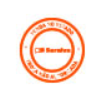

In [ ]:
soup

In [ ]:
title = soup.find('h1', class_='title').string.strip()
title

AttributeError: ignored